# Исследование о продажах компьютерных игр  


**Описание проекта**

Предоставлены данные интернет-магазина компьютерных игр «Стримчик» о продажах игр до 2016 года. Данные включают оценки пользователей и экспертов, жанры и платформы. 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

**Цели исследования**

- установить факторы, влияющие на успешность игры;
- выявить потенциально наиболее популярный продукт;
- подготовить результаты для планирования рекламных кампаний.

**Ход исследования**

1) Открыть данные из файла `/datasets/games.csv` и провести обзор данных.

2) Подготовить данные для исследования:
- Заменить названия столбцов;
- Преобразовать типы данных;
- Обработать пропуски при необходимости;
- Обработать значения в столбце с оценкой пользователей;
- Посчитать суммарные продажи во всех регионах и внести результаты в отдельный столбец.

3) Провести исследовательский анализ:
- Определить сколько игр выпускалось в разные годы.
- Исследовать изменения продаж по платформам и определить актуальный период.
- Определить потенциально прибыльные платформы.
- Исследовать распределение глобальных продаж игр в разбивке по платформам.
- Посмотреть, как влияют на продажи отзывы пользователей и критиков в рамках одной платформы.
- Посмотреть на общее распределение игр по жанрам и определить самые прибыльные жанры. 

4) Составить портрет пользователя каждого региона:
- Самые популярные платформы (топ-5) в каждом регионе;
- Самые популярные жанры (топ-5) в каждом регионе;
- Влияние рейтинга ESRB на продажи в регионах.

5) Проверить гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

6) Описать результаты исследования в общем выводе.


### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_release', 
                      'Genre':'genre', 'Other_sales':'other_sales', 'Critic_Score':'critic_score',
                     'User_Score':'user_score', 'Rating':'rating'}, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year_release  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   NA_sales      16715 non-null  float64
 5   EU_sales      16715 non-null  float64
 6   JP_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,year_release,NA_sales,EU_sales,JP_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Таблица содержит 11 колонок и 16715 строк. Есть пропуски и некорректные типы данных.  
Названия столбцов переименованы.

### Предобработка данных

#### Обработка пропусков и преобразование типов данных

In [6]:
data.isna().mean()

name            0.000120
platform        0.000000
year_release    0.016093
genre           0.000120
NA_sales        0.000000
EU_sales        0.000000
JP_sales        0.000000
other_sales     0.000000
critic_score    0.513192
user_score      0.400897
rating          0.404786
dtype: float64

In [7]:
# Проверка на наличие явных дубликатов
data.duplicated().sum()

0

In [8]:
# Отбрасываем строки с пропусками в соответствующих столбцах
data.dropna(subset=['name', 'year_release', 'genre'], inplace=True)

In [9]:
# Заменим тип данных в колонке "год релиза" на целочисленный
data['year_release'] = data['year_release'].astype('int')

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Тип данных в колонке "оценка пользователей" - object, необходимо сделать числовой, однако присутствуют значения "tbd", которые нужно предварительно заменить для этого. "tbd" означает, что оценка еще не выставлена, поэтому можно заменить на пропуск.

In [11]:
# Посмотрим сколько значений "tbd" в колонке "оценка пользователей"
data.query('user_score == "tbd"')['user_score'].count()

2376

In [12]:
# Заменим значение "tbd" на пропуск
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [13]:
# Заменим тип данных в столбце "оценка пользователей" на float
data['user_score'] = data['user_score'].astype('float')

In [14]:
# Заменим пропуски в колонке "рейтинг" на "неизвестный"
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year_release  16444 non-null  int32  
 3   genre         16444 non-null  object 
 4   NA_sales      16444 non-null  float64
 5   EU_sales      16444 non-null  float64
 6   JP_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<div style="border:solid blue 1px; padding: 10px"> 
    
В результате предобработки были удалены строки с пропусками, которые малочисленны и сложно восстанавливаемые. Заменены типы данных в столбцах "год релиза" и "оценка пользователей".   
Пропуски в столбце "рейтинг" выделили в отдельную категорию, присвоив им значения "неизвестный". Пропуски в столбах "оценка критиков", "оценка пользователей" оставили, поскольку нет логичного и надежного способа их заполнить, дальнейший анализ с участием этих значений будем проводить по имеющимся данным.

Пропуски в столбце "рейтинг" можно объяснить тем, что информация действительно отсутствует и для таких игр не присвоен рейтинг ESRB. Этот рейтинг распространен в Северной Америке, возможно в других регионах используются другие рейтинговые системы или не являются обязательными. 
Пропуски в оценках пользователей и критиков также могут объясняться тем, что оценки не были выставлены.

#### Добавление суммарных продаж всех регионов

In [16]:
data['total_sales'] = data[['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']].sum(axis=1)

In [17]:
data.head()

,name,platform,year_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Исследовательский анализ

#### Количество игр, выпускаемых в разные годы

In [18]:
# Определяем на сколько корзин делить гистограмму
data['year_release'].nunique()

37

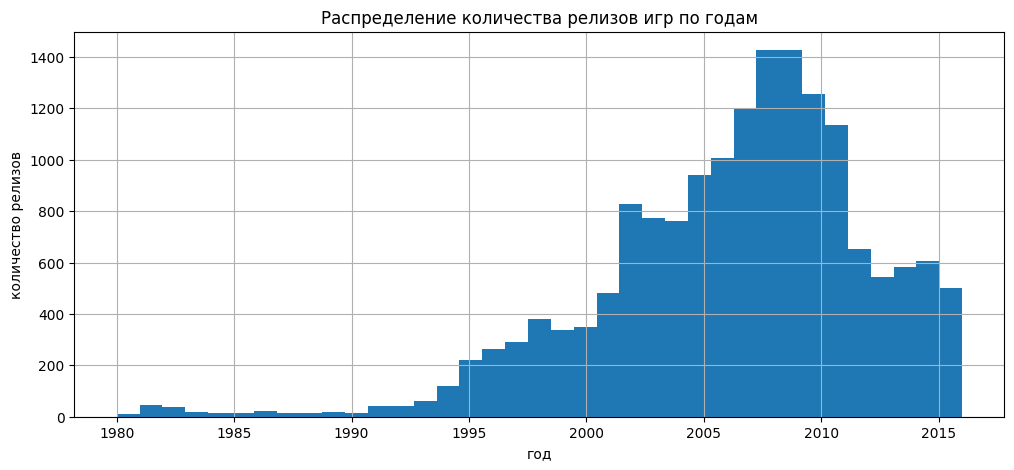

In [19]:
data['year_release'].hist(bins=37, figsize=(12, 5))
plt.title('Распределение количества релизов игр по годам')
plt.ylabel('количество релизов')
plt.xlabel('год');

<div style="border:solid blue 1px; padding: 10px">
    
До 1995 года выпускалось очень мало игр. С 1995 года наблюдается постепенный рост, с 2000 года - стремительное увеличение количества релизов. В 2008-2009 годах выпущено наибольшее количество игр. С 2012 года количество выпускаемых игр снизилось практически вдвое, но остается достаточно стабильным в последующие года.

#### Изменения продаж по платформам.  Платформы с наибольшими суммарными продажами и их распределение по годам.

In [20]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

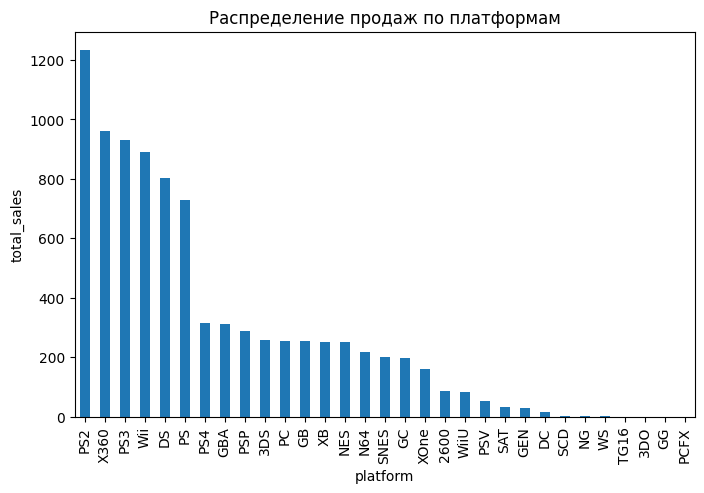

In [21]:
(
    data.groupby('platform')['total_sales'].sum()
    .sort_values(ascending=False)
    .plot(kind='bar', title='Распределение продаж по платформам', figsize=(8, 5))
         )
plt.ylabel('total_sales');

In [22]:
top_platform = (
    data.query('platform in ["PS2", "X360", "PS3", "Wii", "DS"]')
    .groupby(by=['platform', 'year_release'])['total_sales'].agg(['count', 'sum'])
    .reset_index()
)

In [23]:
top_platform

,platform,year_release,count,sum
0,DS,1985,1,0.02
1,DS,2004,23,17.27
2,DS,2005,118,130.14
3,DS,2006,201,119.81
4,DS,2007,376,146.94
5,DS,2008,492,145.31
6,DS,2009,403,119.54
7,DS,2010,323,85.02
8,DS,2011,153,26.18
9,DS,2012,23,11.01


Консоль DS была выпущена в 2004, удалим аномалию, соответствующую первой строке.

In [24]:
top_platform.drop(index=0, inplace=True)

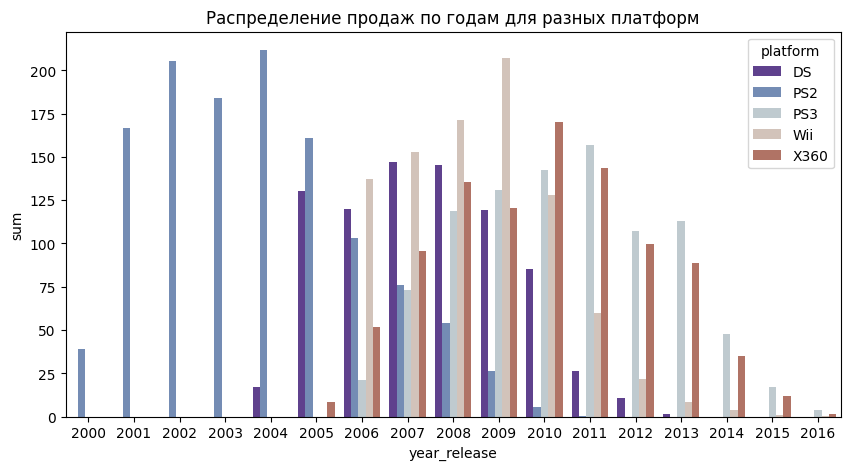

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
color = sns.color_palette('twilight_shifted')
sns.barplot(data=top_platform, x="year_release", y="sum", hue="platform", ax=ax, palette=color)
plt.title('Распределение продаж по годам для разных платформ')
plt.legend(loc='upper right', title='platform');

<div style="border:solid blue 1px; padding: 10px">
    
До 2005 года наиболее высокие продажи приходились на PS2 и только вышедшую к этому времени DS, с 2006 года появляется больше новых платформ, на которые приходятся основные продажи.  
За период около 10 лет появляются новые платформы и исчезают. При этом пик продаж приходится приблизительно на середину времени существования платформ.   
Можно предсказать актуальность платформ к 2017 году, выбрав актуальный период с 2014 года.

In [26]:
actual_period = (
    data.query('year_release > 2013')
    .groupby(by=['platform', 'year_release'])['total_sales'].sum()
    .reset_index()
)

In [27]:
actual_period

,platform,year_release,total_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52
5,PC,2016,5.25
6,PS3,2014,47.76
7,PS3,2015,16.82
8,PS3,2016,3.60
9,PS4,2014,100.00


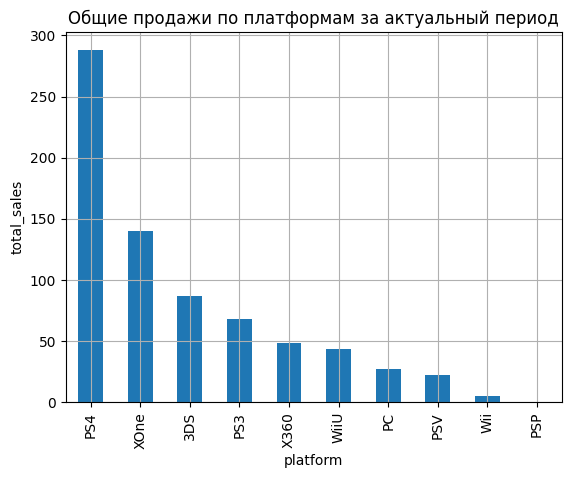

In [28]:
actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Общие продажи по платформам за актуальный период')
plt.ylabel('total_sales');

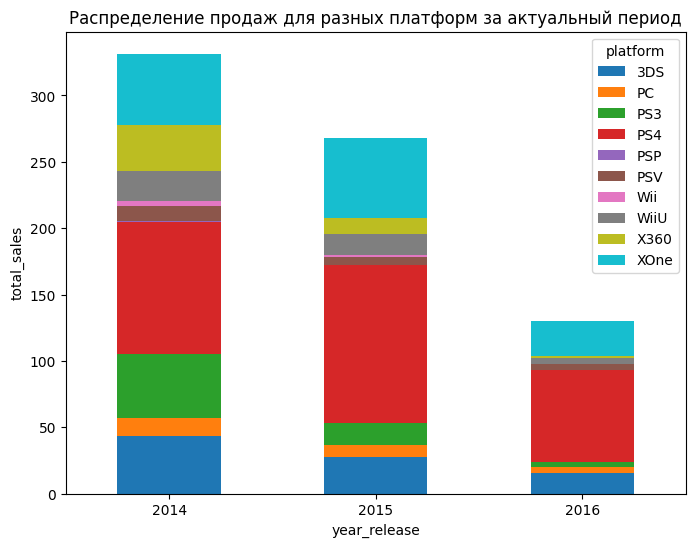

In [29]:
ax = (
    actual_period.pivot_table(index='year_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', stacked=True, figsize=(8,6), rot=0)
)
plt.title('Распределение продаж для разных платформ за актуальный период')
plt.ylabel('total_sales');

<div style="border:solid blue 1px; padding: 10px">
    
Так как данные за 2016 год могут быть неполными, не берем во внимание снижение продаж в 2016 году.  
Лидируют по продажам за актуальный период PS4, XOne, 3DS. Продажи игр для PS4 и XOne увеличиваются, для всех остальных платформ - снижаются. Для платформ PS3 и X360 можно ожидать дальнейшего снижения продаж, поскольку они являются предыдущими поколениями новых платформ PS4 и XOne. Перспективными являются PS4 и XOne, т.к они появились только в 2013 году, можно ожидать рост продаж в 2017 году. 

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [30]:
# Не будем включать в рассмотрение устаревшие платформы
data_actual = data.query('year_release > 2013 and platform in ["PS4", "XOne", "3DS", "PC", "PSV", "WiiU"]')

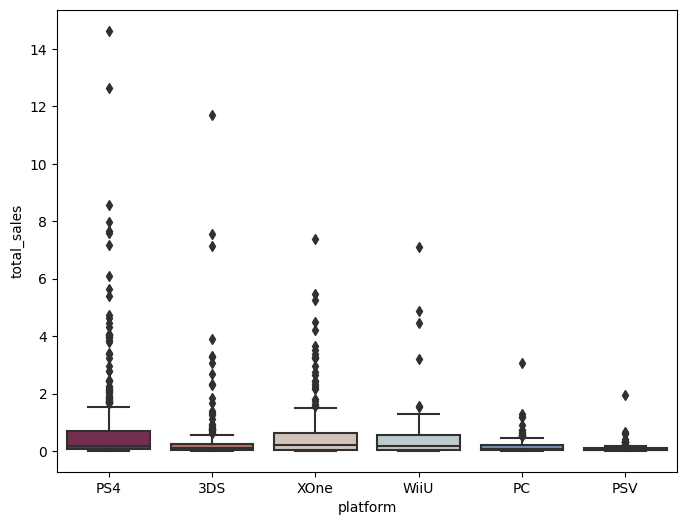

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=data_actual, x="platform", y="total_sales", hue="platform", dodge=False, ax=ax, palette='twilight_shifted_r')
ax.get_legend().remove();

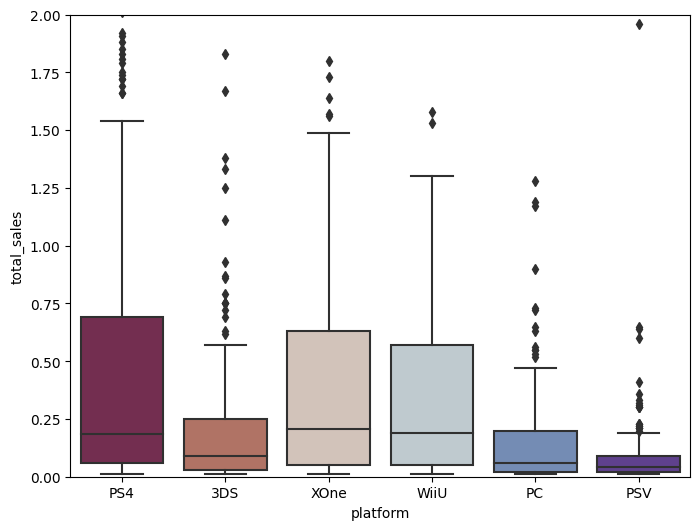

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=data_actual, x="platform", y="total_sales", hue="platform", dodge=False, ax=ax, palette='twilight_shifted_r')
plt.ylim(0, 2)
ax.get_legend().remove();

<div style="border:solid blue 1px; padding: 10px">

Распределения скошены вправо, имеют длинные "хвосты" высоких продаж (максимально достигают около 8-14 млн.проданных копий), медианные значения смещены в сторону меньших продаж. Практически одинаково распределены глобальные продажи для новых платформ PS4, XOne и WiiU с близкими медианными значениями. Более низкие продажи характерны для 3DS и PC, и самые низкие - для PSV.

#### Влияние на продажи отзывов пользователей и критиков. 

Рассмотрим влияние отзывов пользователей и критиков на продажи для консоли XOne:

In [33]:
# Функция описывает зависимость продаж и отзывов для выбранной платформы
def corr_sales(console):
    df_platform = data_actual.loc[data_actual['platform'] == console]
    
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    sns.scatterplot(data=df_platform, x='user_score', y='total_sales', ax=ax[0])
    sns.scatterplot(data=df_platform, x='critic_score', y='total_sales', ax=ax[1])
    plt.show()
    print(f"""
    Коэффициент корреляции между оценками пользователей и продажами: {df_platform['total_sales']
                                                                     .corr(df_platform['user_score'])}
    Коэффициент корреляции между оценками критиков и продажами: {df_platform['total_sales']
                                                                .corr(df_platform['critic_score'])}""")

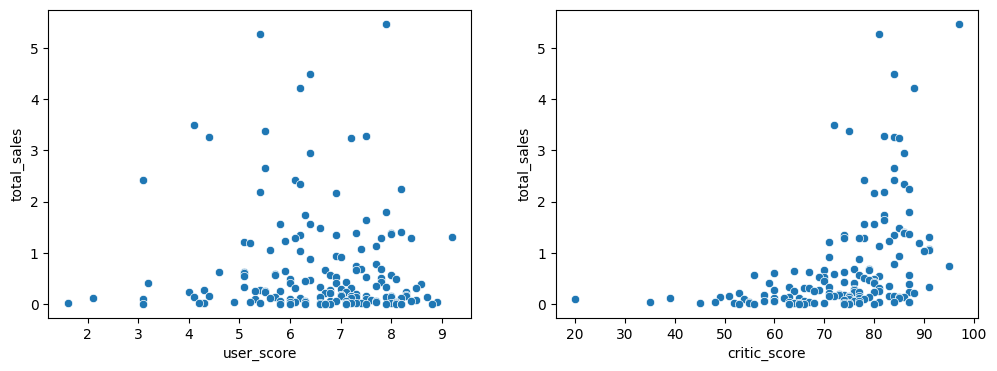


    Коэффициент корреляции между оценками пользователей и продажами: -0.07038392806475809
    Коэффициент корреляции между оценками критиков и продажами: 0.42867694370333187


In [34]:
corr_sales('XOne')

<div style="border:solid blue 1px; padding: 10px"> 
    
Для пратформы XOne прослеживается слабая положительная зависимость между общими продажами и оценками критиков. Коэффициент корреляции - 0.43.  
Нет взаимосвязи между общими продажами и оценками пользователей.

Рассмотрим аналогичное влияние для других платформ:

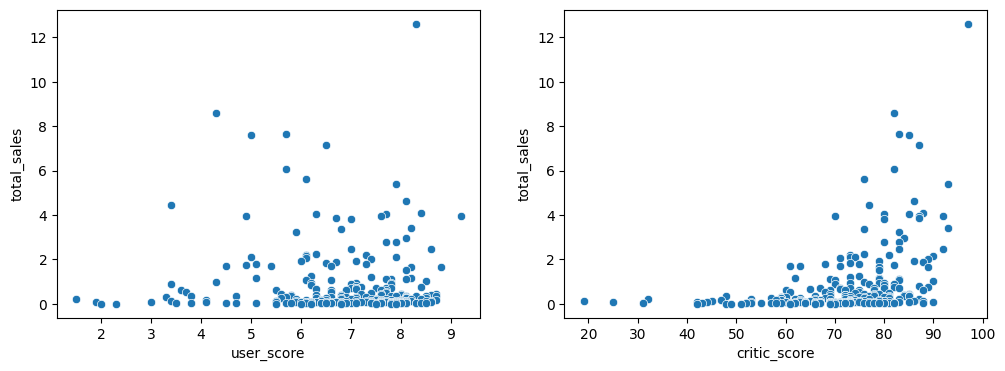


    Коэффициент корреляции между оценками пользователей и продажами: -0.04013158947269733
    Коэффициент корреляции между оценками критиков и продажами: 0.40266141068104094


In [35]:
corr_sales('PS4')

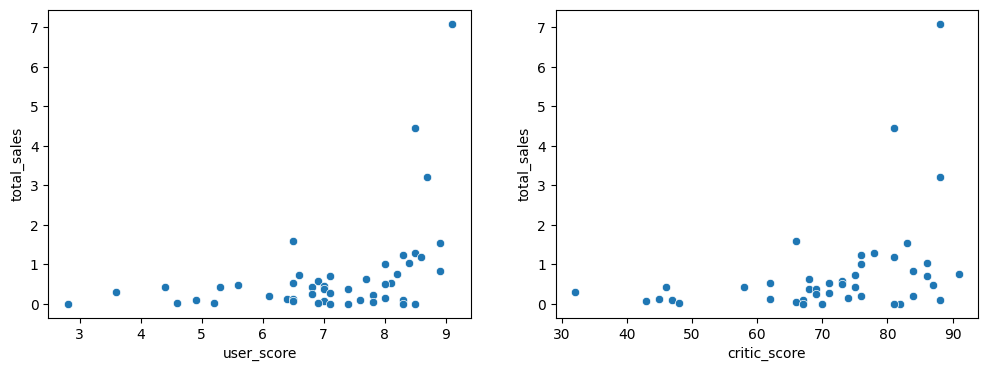


    Коэффициент корреляции между оценками пользователей и продажами: 0.4079264579217078
    Коэффициент корреляции между оценками критиков и продажами: 0.370201412480884


In [36]:
corr_sales('WiiU')

<div style="border:solid blue 1px; padding: 10px">

Есть слабая зависимость между общими продажами и оценками критиков и она практически одинакова для всех трех платформ XOne, PS4, WiiU. Такая же зависимость для платформы WiiU между общими продажами и оценками пользователей, хотя для XOne и PS4 ее нет.

#### Распределение игр по жанрам: самые прибыльные жанры

In [37]:
(
    data_actual.groupby('genre')['total_sales'].agg(['sum', 'count'])
    .sort_values('sum', ascending=False)
)

,sum,count
genre,,
Action,167.54,495
Shooter,145.11,99
Role-Playing,92.05,187
Sports,77.96,104
Misc,26.43,89
Racing,24.88,53
Fighting,24.67,38
Platform,17.14,33
Adventure,13.44,148


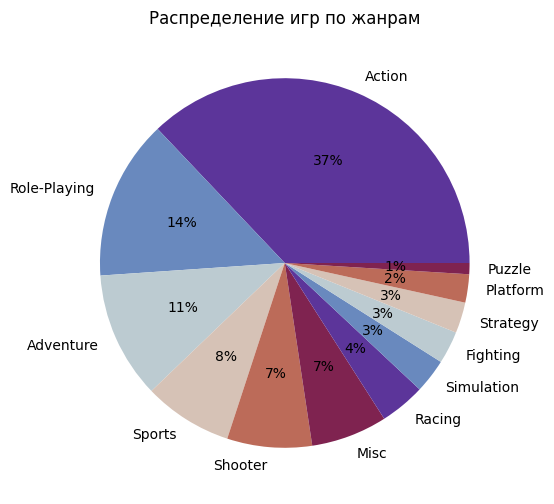

In [38]:
(
    data_actual.groupby('genre')['total_sales'].agg(['sum', 'count'])
    .sort_values('count', ascending=False)
    .plot(kind='pie', y='count', legend=False, colors=color, figsize=(6,6), autopct='%1.0f%%')

)
plt.ylabel(None)
plt.title('Распределение игр по жанрам');

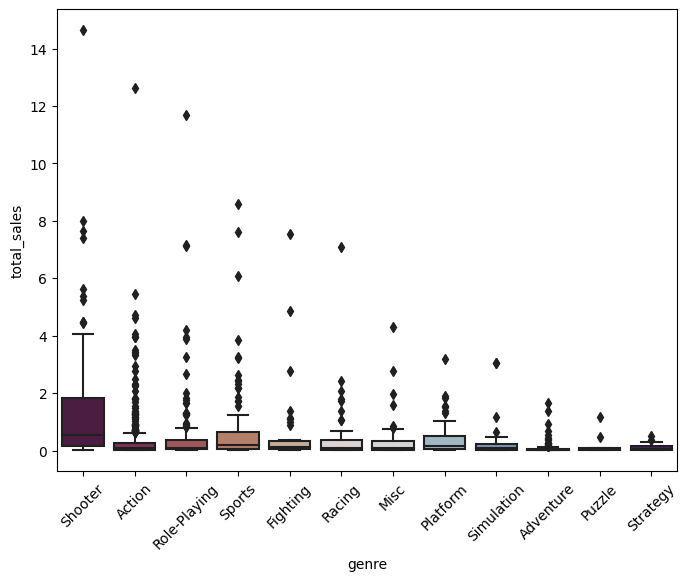

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=data_actual, x="genre", y="total_sales", hue="genre", dodge=False, ax=ax, palette='twilight_shifted_r')
ax.get_legend().remove()
plt.xticks(rotation=45);

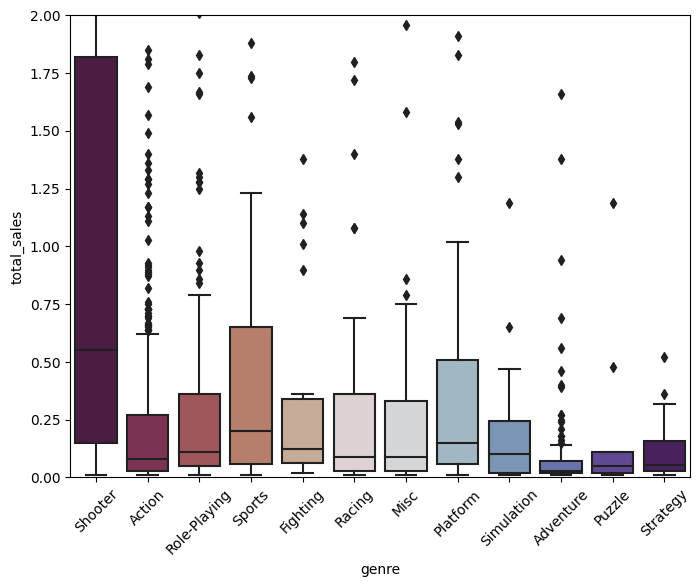

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=data_actual, x="genre", y="total_sales", hue="genre", dodge=False, ax=ax, palette='twilight_shifted_r')
ax.get_legend().remove()
plt.ylim(0, 2)
plt.xticks(rotation=45);

<div style="border:solid blue 1px; padding: 10px">

Наиболее высокие продажи игр в жанре Shooter, для него характерно самое высокое медианное значение и длинный ряд успешно продающихся игр. Хотя этому жанру принадлежат только 7% игр.  
Кроме того, относительно хорошо продаются игры в жанрах Sports и Platform, у них приблизительно равные медианные значения, для жанра Sports длиннее ряд высоких продаж.  
Самое большое количество игр выходит в жанре Action (37%) и не пользуются популярностью. Большое количество игр (11% от общего числа) в жанре Adventure имеют самые низкие продажи.

### Портрет пользователя каждого региона

####  Самые популярные платформы в разных регионах

In [41]:
data_region = (
    data_actual.pivot_table(index='platform', values=['NA_sales', 'EU_sales', 'JP_sales'], aggfunc='sum')
)

In [42]:
data_region['EU_sales'] = data_region['EU_sales'] / data_region['EU_sales'].sum()
data_region['NA_sales'] = data_region['NA_sales'] / data_region['NA_sales'].sum()
data_region['JP_sales'] = data_region['JP_sales'] / data_region['JP_sales'].sum()

data_region = np.round(data_region, 3)

In [43]:
data_region

,EU_sales,JP_sales,NA_sales
platform,,,
3DS,0.071,0.543,0.098
PC,0.079,0.000,0.031
PS4,0.573,0.184,0.426
PSV,0.016,0.179,0.011
WiiU,0.058,0.090,0.084
XOne,0.204,0.004,0.351


In [44]:
# Обозначим платформы которые не входят в топ-5 как "другие" для каждого региона
data_region['EU_platform'] = data_region.index
data_region['JP_platform'] = data_region.index
data_region['NA_platform'] = data_region.index

index_list_EU = data_region.sort_values('EU_sales', ascending=False).head(5).index
data_region['EU_platform'] = (
    data_region['EU_platform'].where(data_region['EU_platform'].isin(index_list_EU), 'other')
)

index_list_JP = data_region.sort_values('JP_sales', ascending=False).head(5).index
data_region['JP_platform'] = (
    data_region['JP_platform'].where(data_region['JP_platform'].isin(index_list_JP), 'other')
)

index_list_NA = data_region.sort_values('NA_sales', ascending=False).head(5).index
data_region['NA_platform'] = (
    data_region['NA_platform'].where(data_region['NA_platform'].isin(index_list_NA), 'other')
)

In [45]:
data_region

,EU_sales,JP_sales,NA_sales,EU_platform,JP_platform,NA_platform
platform,,,,,,
3DS,0.071,0.543,0.098,3DS,3DS,3DS
PC,0.079,0.000,0.031,PC,other,PC
PS4,0.573,0.184,0.426,PS4,PS4,PS4
PSV,0.016,0.179,0.011,other,PSV,other
WiiU,0.058,0.090,0.084,WiiU,WiiU,WiiU
XOne,0.204,0.004,0.351,XOne,XOne,XOne


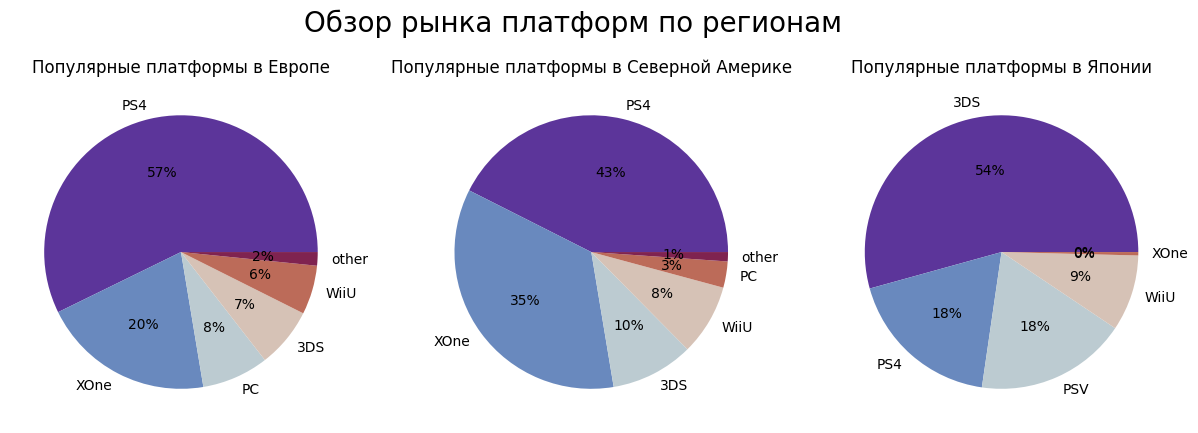

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

(
    data_region.pivot_table(index='EU_platform', values='EU_sales', aggfunc='sum')
    .sort_values('EU_sales', ascending=False)
    .plot(kind='pie', x='EU_platform', y='EU_sales', ax=ax[0], legend=False, colors=color, autopct='%1.0f%%')
    )
(
    data_region.pivot_table(index='NA_platform', values='NA_sales', aggfunc='sum')
    .sort_values('NA_sales', ascending=False)
    .plot(kind='pie', x='NA_platform', y='NA_sales', ax=ax[1], legend=False, colors=color, autopct='%1.0f%%')
    )
(
    data_region.pivot_table(index='JP_platform', values='JP_sales', aggfunc='sum')
    .sort_values('JP_sales', ascending=False)
    .plot(kind='pie', x='JP_platform', y='JP_sales', ax=ax[2], legend=False, colors=color, autopct='%1.0f%%'
          , normalize=False)
    )

ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)

fig.suptitle('Обзор рынка платформ по регионам', fontsize = 20)
ax[0].set_title('Популярные платформы в Европе')
ax[1].set_title('Популярные платформы в Северной Америке')
ax[2].set_title('Популярные платформы в Японии');

<div style="border:solid blue 1px; padding: 10px">
    
Популярность игровых платформ в Северной Америке и Европе похожи, лидирует среди всех - PS4. При этом в Европе доля продаж игр для PS4 превышает более чем в 2 раза, по сравнению с долей продаж для других платформ, и составляет 57%. В Северной Америке, кроме PS4, высокую популярность имеет XOne (35% всех продаж). Кроме того, в топ-5 входят платформы: 3DS, PC, WiiU. 3DS популярнее в Северной Америке, чем в Европе, а PC наоборот пользуется меньшей популярностью.   
Во всех регионах WiiU занимает практически одинаковые доли продаж (6-9%).   
В Японии более популярны портативные игровые консоли, в частности 3DS, японской компании Nintendo. Эта консоль занимает больше половины всех продаж (54%). В равной степени популярны PSV и PS4. Стоит отметить, что продажи для XOne практически отсутствуют.

#### Самые популярные жанры в разных регионах

In [47]:
data_genre = (
    data_actual.pivot_table(index='genre', values=['NA_sales', 'EU_sales', 'JP_sales'], aggfunc='sum')
)

In [48]:
data_genre['EU_sales'] = np.round(data_genre['EU_sales'] / data_genre['EU_sales'].sum(), 3)
data_genre['NA_sales'] = np.round(data_genre['NA_sales'] / data_genre['NA_sales'].sum(), 3)
data_genre['JP_sales'] = np.round(data_genre['JP_sales'] / data_genre['JP_sales'].sum(), 3)

In [49]:
data_genre

,EU_sales,JP_sales,NA_sales
genre,,,
Action,0.280,0.303,0.260
Adventure,0.022,0.039,0.017
Fighting,0.027,0.062,0.048
Misc,0.037,0.063,0.044
Platform,0.028,0.033,0.028
Puzzle,0.002,0.011,0.003
Racing,0.057,0.020,0.033
Role-Playing,0.114,0.352,0.128
Shooter,0.248,0.052,0.286


In [50]:
# Обозначим жанры которые не входят в топ-5 как "другие" для каждого региона
data_genre['EU_genre'] = data_genre.index
data_genre['JP_genre'] = data_genre.index
data_genre['NA_genre'] = data_genre.index

top_genre_EU = data_genre.sort_values('EU_sales', ascending=False).head(5).index
data_genre['EU_genre'] = (
    data_genre['EU_genre'].where(data_genre['EU_genre'].isin(top_genre_EU), 'other')
)

top_genre_JP = data_genre.sort_values('JP_sales', ascending=False).head(5).index
data_genre['JP_genre'] = (
    data_genre['JP_genre'].where(data_genre['JP_genre'].isin(top_genre_JP), 'other')
)

top_genre_NA = data_genre.sort_values('NA_sales', ascending=False).head(5).index
data_genre['NA_genre'] = (
    data_genre['NA_genre'].where(data_genre['NA_genre'].isin(top_genre_NA), 'other')
)

In [51]:
data_genre

,EU_sales,JP_sales,NA_sales,EU_genre,JP_genre,NA_genre
genre,,,,,,
Action,0.280,0.303,0.260,Action,Action,Action
Adventure,0.022,0.039,0.017,other,other,other
Fighting,0.027,0.062,0.048,other,Fighting,Fighting
Misc,0.037,0.063,0.044,other,Misc,other
Platform,0.028,0.033,0.028,other,other,other
Puzzle,0.002,0.011,0.003,other,other,other
Racing,0.057,0.020,0.033,Racing,other,other
Role-Playing,0.114,0.352,0.128,Role-Playing,Role-Playing,Role-Playing
Shooter,0.248,0.052,0.286,Shooter,Shooter,Shooter


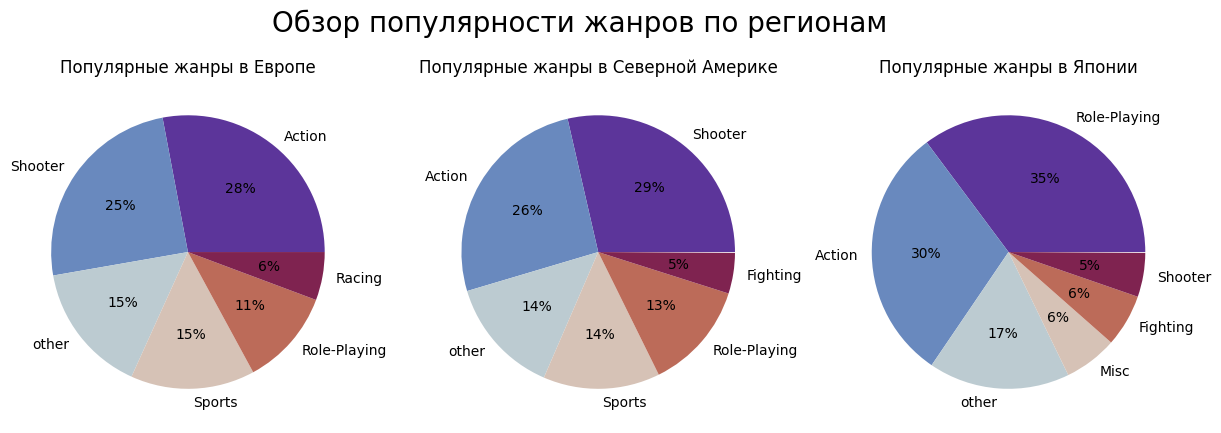

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

(
    data_genre.pivot_table(index='EU_genre', values='EU_sales', aggfunc='sum')
    .sort_values('EU_sales', ascending=False)
    .plot(kind='pie', x='EU_genre', y='EU_sales', ax=ax[0], legend=False, colors=color, autopct='%1.0f%%')
    )
(
    data_genre.pivot_table(index='NA_genre', values='NA_sales', aggfunc='sum')
    .sort_values('NA_sales', ascending=False)
    .plot(kind='pie', x='NA_genre', y='NA_sales', ax=ax[1], legend=False, colors=color, autopct='%1.0f%%'
          , normalize=False)
    )
(
    data_genre.pivot_table(index='JP_genre', values='JP_sales', aggfunc='sum')
    .sort_values('JP_sales', ascending=False)
    .plot(kind='pie', x='JP_genre', y='JP_sales', ax=ax[2], legend=False, colors=color, autopct='%1.0f%%'
          , normalize=False)
    )

ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)

fig.suptitle('Обзор популярности жанров по регионам', fontsize=20)
ax[0].set_title('Популярные жанры в Европе')
ax[1].set_title('Популярные жанры в Северной Америке')
ax[2].set_title('Популярные жанры в Японии');

<div style="border:solid blue 1px; padding: 10px">

В Европе и Северной Америке предпочтения в жанрах похожи, наиболее популярны жанры Action и Shooter. При этом в Европе несколько популярнее Action, а в Северной Америке - Shooter. Практически равные доли продаж в этих регионах жанров Role-Playing и Sports. В Европе топ-5 замыкает жанр Racing, а в Северной Америке - Fighting.  
В Японии лидирующие позиции занимает жанр Role-Playing, несколько уступает Action, эти жанры занимают 65% всех продаж. Кроме них практически в равной степени в топ-5 входят жанры Misc, Fighting, Shooter.

#### Влияние рейтинга ESRB на продажи в отдельных регионах

In [53]:
data_actual['rating'].value_counts()

unknown    608
T          216
M          212
E          162
E10+       137
Name: rating, dtype: int64

In [54]:
data_rating = (
    data_actual.pivot_table(index='rating', values=['NA_sales', 'EU_sales', 'JP_sales'], aggfunc='sum')
    .reset_index()
)

In [55]:
data_rating['EU_sales'] = data_rating['EU_sales'] / data_rating['EU_sales'].sum()
data_rating['NA_sales'] = data_rating['NA_sales'] / data_rating['NA_sales'].sum()
data_rating['JP_sales'] = data_rating['JP_sales'] / data_rating['JP_sales'].sum()

data_rating = np.round(data_rating, 2)

In [56]:
data_rating

,rating,EU_sales,JP_sales,NA_sales
0,E,0.20,0.10,0.16
1,E10+,0.08,0.05,0.10
2,M,0.36,0.08,0.36
3,T,0.13,0.15,0.14
4,unknown,0.22,0.62,0.24


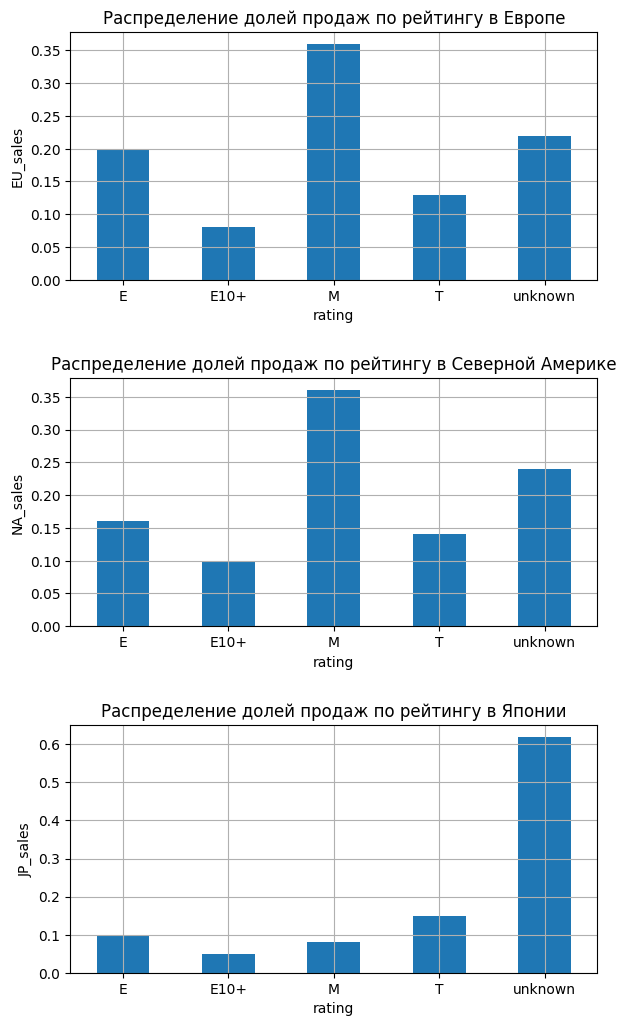

In [57]:
fig, ax = plt.subplots(3, 1, figsize=(6, 10))

plt.tight_layout(h_pad= 5)

i = 0
for region in ['EU_sales', 'NA_sales', 'JP_sales']:
    (
    data_rating
    .plot(kind='bar', x='rating', y=region, ax=ax[i], grid=True, legend=False, rot=0)
    )
    ax[i].set_ylabel(region)
    i += 1
    
ax[0].set_title('Распределение долей продаж по рейтингу в Европе')
ax[1].set_title('Распределение долей продаж по рейтингу в Северной Америке')
ax[2].set_title('Распределение долей продаж по рейтингу в Японии');

<div style="border:solid blue 1px; padding: 10px">
  
В Европе и Северной Америке одинаковое влияние рейтинга ESRB на продажи. Больше игр покупают с рейтингом "М" - для взрослых старше 17 лет.   
В Японии мало популярен рейтинг ESRB, возможно используются другие рейтинговые системы. Среди игр, для которых выставлен рейтинг, больше продаются с рейтингом "T" - для подростков от 13 лет.

### Проверка гипотез

H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны;  
H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [58]:
pc_scores = data_actual.query('platform == "PC"')['user_score'].dropna()
xone_scores = data_actual.query('platform == "XOne"')['user_score'].dropna()

In [59]:
alpha = 0.05

results = st.ttest_ind(xone_scores, pc_scores, equal_var = False)

print(f'Значение p-value - {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Невозможно отвергнуть нулевую гипотезу')

Значение p-value - 0.11601398086668835
Невозможно отвергнуть нулевую гипотезу


По имеющимся данным на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Вероятность случайно получить такое или большее различие средних рейтингов - около 12%, поэтому невозможно утвержать о значимом различии. 

H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны;  
H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [60]:
action_score = data_actual.query('genre == "Action"')['user_score'].dropna()
sports_score = data_actual.query('genre == "Sports"')['user_score'].dropna()

In [61]:
alpha = 0.05

results = st.ttest_ind(action_score, sports_score, equal_var = False)

print(f'Значение p-value - {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Невозможно отвергнуть нулевую гипотезу')

Значение p-value - 1.1664151897936176e-08
Отвергаем нулевую гипотезу


По имеющимся данным на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу альтернативной. Значение p-value, вероятность случайно получить такое или большее различие средних рейтингов, слишком маленькое.

Нулевая гипотеза Н0 формулируется исходя из предположения равенства средних двух генеральных совокупностей, а альтернативная Н1 предполагает их отличие.  
Для проверки гипотез применили критерий ttest_ind, поскольку он позволяет проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

### Общий вывод

<div style="border:solid blue 1px; padding: 10px">
 
Были изучены данные интернет-магазина компьютерных игр «Стримчик» о продажах игр. Выполнена предобработка данных, в том числе, удалены некоторые строки с пропусками, некоторые пропуски заменены, преобразованы типы данных, произведены расчеты суммарных продаж в регионах и добавлены в таблицу. Пропуски в данных, по-видимому, действительно связаны с отсутствием соответствующей информации.  
    
По результатам анализа о количестве выпускаемых игр в разные года и измении продаж по платформам был выбран актуальный период с 2014 года. Было установлено, что перспективными платформами являются PS4 и XBox One, т.к. продажи для них растут и являются достаточно большими по сравнению с другими. Распределения глобальных продаж для этих двух платформ практически одинаковые.    
Высокие продажи для платформ PS3 и X360 сильно снижаются к концу актуального периода, поскольку они являются предыдущими поколениями новых платформ, поэтому они в дальнейшем бесперспективны.  
    
Выявлена положительная взаимосвязь между оценками критиков и глобальными продажами, для трех рассмотренных платформ PS4, XOne и WiiU. Для платформы WiiU такая же взаимосвязь наблюдалась между оценками пользователей и продажами.

Наиболее высокие продажи игр наблюдаются в жанре Shooter, хотя этому жанру принадлежат только 7% игр. Также можно выделить жанры Sports и Platform с относительно хорошими продажами игр.  
Не пользуется популярностью Action, хотя в этом жанре выходит самое большое количество игр (37% от общего количества). Большое количество игр (11%) в жанре Adventure имеют самые низкие продажи.
    
Изучены предпочтения пользователей в разных регионах. Во многом схожи предпочтения пользователей Европы и Северной Америки:
- Наиболее популярной платформой является PS4, особенно в Европе, где доля продаж для этой платформы составляет 57%. В Северной Америке высокую популярность имеет также XOne (35%), в Европе меньше (20%). Остальные продажи приходятся в основном на 3DS, PC, WiiU. 3DS популярнее в Северной Америке, чем в Европе, а PC наоборот пользуется меньшей популярностью.
- Самыми популярными жанрами являются Action и Shooter. Практически равные доли продаж жанров Role-Playing и Sports. В Европе топ-5 замыкает жанр Racing, а в Северной Америке - Fighting.
- Больше игр покупают с рейтингом "М" - для лиц старше 17 лет. 

Для пользователей из Японии:
- Наиболее популярны портативные игровые консоли, в частности 3DS, которая занимает больше половины всех продаж (54%). В равной степени популярны PSV и PS4. Остальные продажи приходятся на WiiU. Стоит отметить, что продажи для XOne практически отсутствуют.
- Самым продаваемым жанром является Role-Playing, несколько уступает Action, вместе они занимают 65% всех продаж. Кроме них практически в равной степени в топ-5 входят жанры Misc, Fighting, Shooter.
- Рейтинг ESRB мало популярен и практически не влияет на продажи.
   
Для проверки гипотез "*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*" и "*Средние пользовательские рейтинги жанров Action и Sports разные*" применили критерий ttest_ind. На уровне значимости 5% не удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC; отвергли нулевую гипотезу в пользу альтернативной - средние пользовательские рейтинги жанров Action и Sports разные.